In [1]:
import koreanize_matplotlib
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

/tmp/ipykernel_13931/3961791937.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


데이터베이스에서 수집 및 정리된 데이터 가져오기

In [2]:
db = mysql.connector.Connect(
    host='database-1.cls80ok4wdvh.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='min',
    password='addinedu1234!',
    database='OliveYoung'
)

cur = db.cursor(buffered=True)

In [3]:
def base_to_df(table_name):
    # 테이블에서 데이터 가져오기
    cur.execute(f'SELECT * FROM {table_name}')
    result = cur.fetchall()
    # 컬럼 이름 가져오기
    cur.execute(f'DESC {table_name}')
    column_info = cur.fetchall()
    column_names = [col[0] for col in column_info]
    # DataFrame 생성 및 컬럼 이름 설정
    df = pd.DataFrame(result, columns=column_names)
    return df

In [4]:
lotion_df = base_to_df('lotion')
lotion_df.head()

,브랜드명,제품명,원가,세일가,평점 갯수,평점,건성,복합성,지성,보습,진정,주름/미백,자극x,보통,자극O,성분
0,아이디얼포맨,아이디얼 포 맨 퍼펙트 올인원 어워즈 한정 기획,29000,20900,3255,4.9,26,67,7,66,30,4,65,35,1,"정제수,글리세린,메틸트라이메티콘,메틸프로판다이올,에틸헥실스테아레이트,에탄올,1,2-..."
1,아이디얼포맨,아이디얼 포 맨 프레시 올인원 기획,28000,22400,1416,4.8,14,33,53,52,48,0,71,29,0,"정제수,메틸프로판다이올,다이프로필렌글라이콜,1,2-헥산다이올,나이아신아마이드,아이소..."
2,닥터지,닥터지 레드 블레미쉬 포 맨 올인원,29700,26600,1584,4.8,28,60,13,51,47,2,75,25,0,"정제수,프로판다이올,부틸렌글라이콜다이카프릴레이트/다이카프레이트,메틸프로판다이올,트라..."
3,아누아,아누아 어성초 70 데일리 로션 200ml,28000,21900,839,4.8,22,62,16,41,59,1,75,23,2,"약모밀추출물,글리세린,1,2-헥산다이올,메틸트라이메티콘,에틸헥실스테아레이트,부틸렌글..."
4,라운드랩,라운드랩 1025 독도 로션 400ml 대용량,39000,25600,7998,4.8,27,61,12,65,35,1,76,22,2,"정제수,글리세린,퀸즈랜드넛오일,1,2-헥산다이올,펜틸렌글라이콜,아이리쉬모스추출물,사..."


In [5]:
db.close()
lotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   브랜드명    221 non-null    object 
 1   제품명     221 non-null    object 
 2   원가      221 non-null    int64  
 3   세일가     221 non-null    int64  
 4   평점 갯수   221 non-null    int64  
 5   평점      221 non-null    float64
 6   건성      221 non-null    int64  
 7   복합성     221 non-null    int64  
 8   지성      221 non-null    int64  
 9   보습      221 non-null    int64  
 10  진정      221 non-null    int64  
 11  주름/미백   221 non-null    int64  
 12  자극x     221 non-null    int64  
 13  보통      221 non-null    int64  
 14  자극O     221 non-null    int64  
 15  성분      221 non-null    object 
dtypes: float64(1), int64(12), object(3)
memory usage: 27.8+ KB


In [7]:
lotion_df = lotion_df.rename(columns={'평점 갯수':'평점수', '건성':'건성%', '지성':'지성%',
                                      '복합성':'복합성%', '보습':'보습%', '진정':'진정%',
                                      '주름/미백':'주름/미백%', '자극x':'저자극%', '보통':'보통%',
                                      '자극O':'자극적%'})

In [8]:
lotion_df

,브랜드명,제품명,원가,세일가,평점수,평점,건성%,복합성%,지성%,보습%,진정%,주름/미백%,저자극%,보통%,자극적%,성분
0,아이디얼포맨,아이디얼 포 맨 퍼펙트 올인원 어워즈 한정 기획,29000,20900,3255,4.9,26,67,7,66,30,4,65,35,1,"정제수,글리세린,메틸트라이메티콘,메틸프로판다이올,에틸헥실스테아레이트,에탄올,1,2-..."
1,아이디얼포맨,아이디얼 포 맨 프레시 올인원 기획,28000,22400,1416,4.8,14,33,53,52,48,0,71,29,0,"정제수,메틸프로판다이올,다이프로필렌글라이콜,1,2-헥산다이올,나이아신아마이드,아이소..."
2,닥터지,닥터지 레드 블레미쉬 포 맨 올인원,29700,26600,1584,4.8,28,60,13,51,47,2,75,25,0,"정제수,프로판다이올,부틸렌글라이콜다이카프릴레이트/다이카프레이트,메틸프로판다이올,트라..."
3,아누아,아누아 어성초 70 데일리 로션 200ml,28000,21900,839,4.8,22,62,16,41,59,1,75,23,2,"약모밀추출물,글리세린,1,2-헥산다이올,메틸트라이메티콘,에틸헥실스테아레이트,부틸렌글..."
4,라운드랩,라운드랩 1025 독도 로션 400ml 대용량,39000,25600,7998,4.8,27,61,12,65,35,1,76,22,2,"정제수,글리세린,퀸즈랜드넛오일,1,2-헥산다이올,펜틸렌글라이콜,아이리쉬모스추출물,사..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,리우젤,리우젤 하이드 레이팅 페이스 모이스처 라이저 3.38oz,41800,29300,8,5.0,0,63,38,88,13,0,100,0,0,"정제수,글리세린,세틸알코올,스테아릴알코올,페녹시에탄올,다이메티콘,글리세릴스테아레이트..."
217,비알티씨,BRTC 파워 옴므 올인원 솔루션 200ml,28000,22400,2333,4.9,17,68,15,63,29,8,82,18,1,"정제수,부틸렌글라이콜,글리세린,에탄올,나이아신아마이드,비스-피이지-18메칠에텔디메칠..."
218,블랙몬스터,블랙몬스터 화이트 올인원 더블세럼 150ml,29000,26400,66,4.8,28,58,14,44,25,31,70,30,0,"""수분세럼:유칼립투스잎추출물,정제수,부틸렌글라이콜,프로판다이올,에탄올,글리세린,1,..."
219,비알티씨,BRTC 파워 옴므 올인원 솔루션 더블 기획,50400,40320,2333,4.9,18,61,21,61,33,6,65,33,2,"정제수,부틸렌글라이콜,글리세린,에탄올,나이아신아마이드,비스-피이지-18메칠에텔디메칠..."


데이터의 신뢰성을 높이기 위해 평점수와 평점을 설정함

In [22]:
lotion_df_r = lotion_df[lotion_df['평점수']>=300]
lotion_df_r = lotion_df_r[lotion_df_r['평점']>=4]
len(lotion_df_r)   #221 -> 93개

93

평균보다 원가가 낮은 데이터를 추가적으로 생성함

In [10]:
lotion_df_m = lotion_df_r[lotion_df_r['원가']<=30000]
len(lotion_df_m)

66

브랜드 개수

/tmp/ipykernel_13931/773042207.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(lotion_df_r['브랜드명'].value_counts()[:10], palette='YlGn_r', width=0.5)


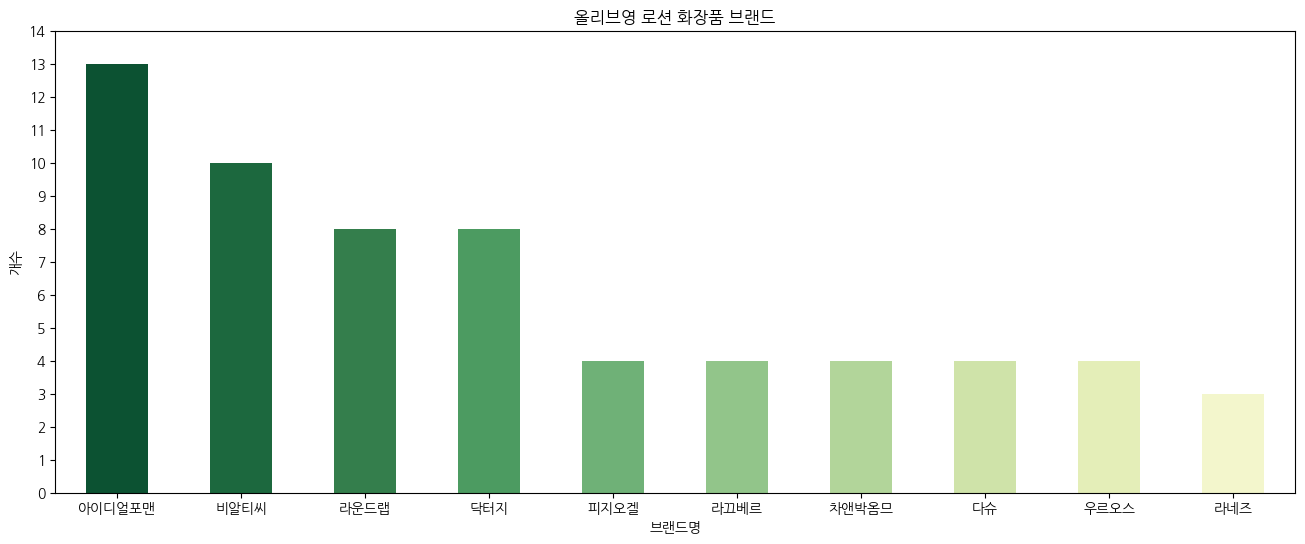

In [12]:
plt.figure(figsize=(16, 6))
sns.barplot(lotion_df_r['브랜드명'].value_counts()[:10], palette='YlGn_r', width=0.5)
plt.title('올리브영 로션 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 15, 1));

/tmp/ipykernel_13931/3006060163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(lotion_df_m['브랜드명'].value_counts()[:10], palette='YlGn_r', width=0.5)


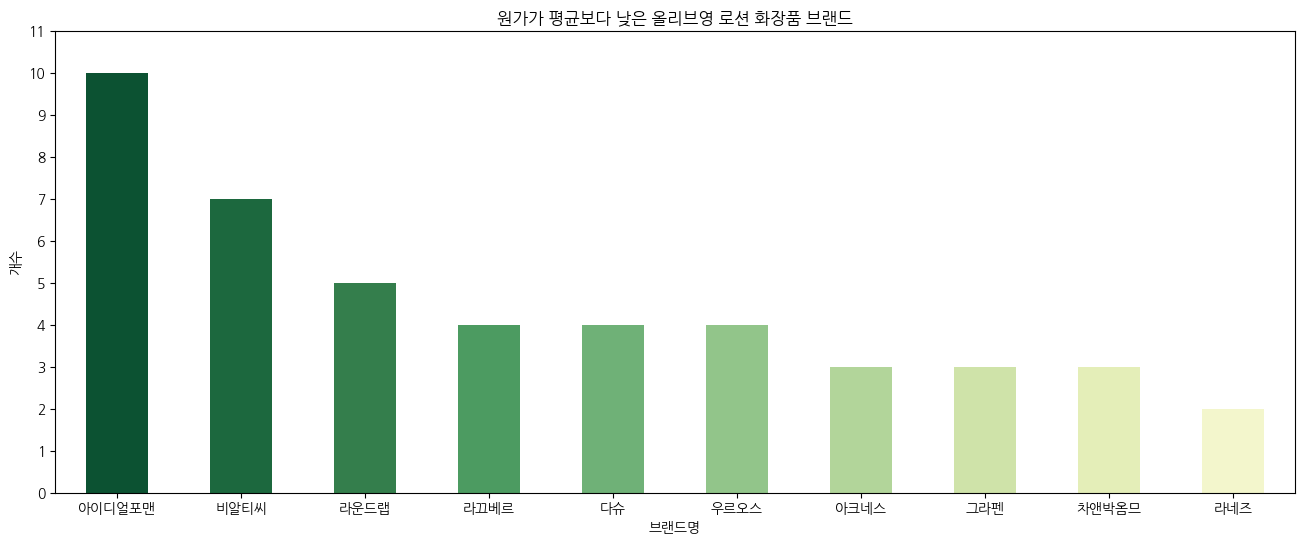

In [13]:
plt.figure(figsize=(16, 6))
sns.barplot(lotion_df_m['브랜드명'].value_counts()[:10], palette='YlGn_r', width=0.5)
plt.title('원가가 평균보다 낮은 올리브영 로션 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 12, 1));

저자극

/tmp/ipykernel_13931/2237334624.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='RdYlGn_r', width=0.5)


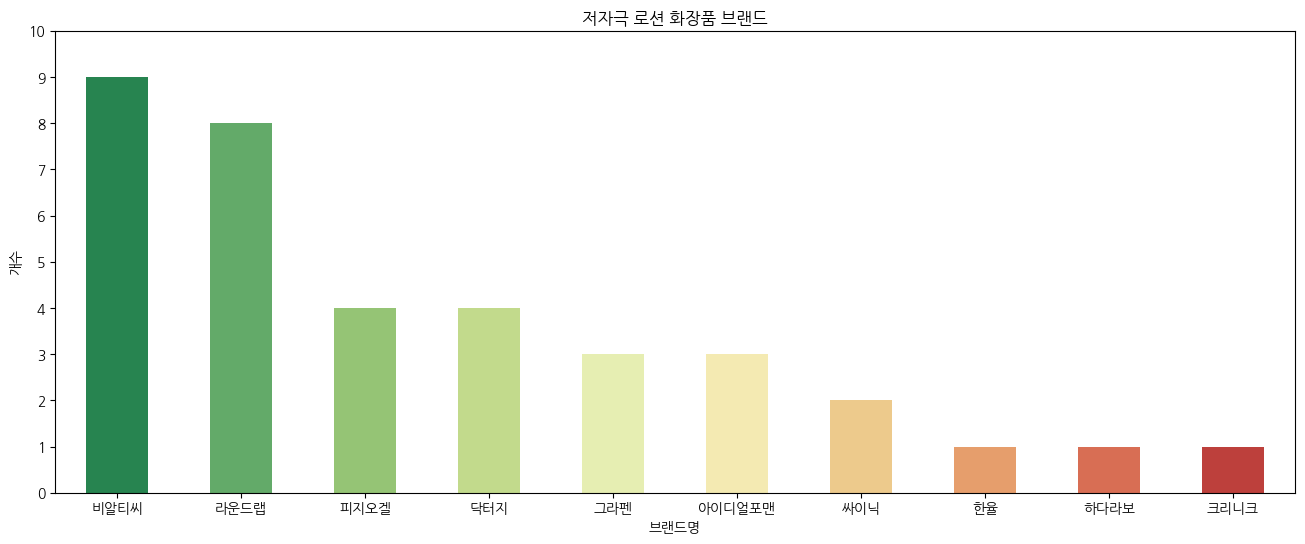

In [14]:
temp1 = lotion_df_r[lotion_df_r['저자극%']>=70].sort_values(by='저자극%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='RdYlGn_r', width=0.5)
plt.title('저자극 로션 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 11, 1));

/tmp/ipykernel_13931/2734043244.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='RdYlGn_r', width=0.5)


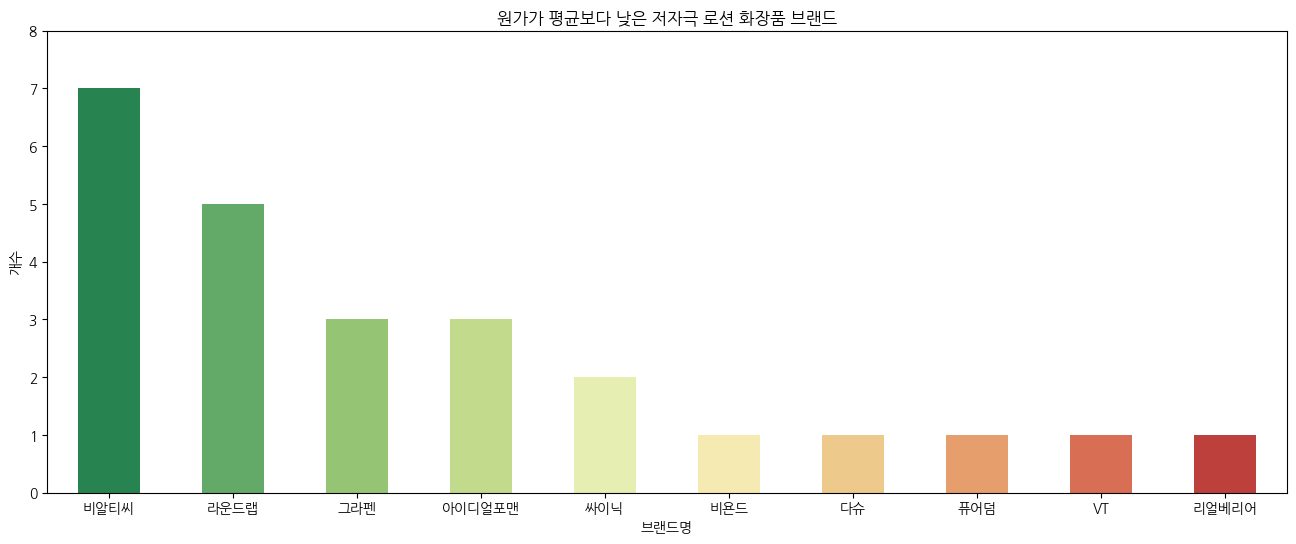

In [15]:
temp1 = lotion_df_m[lotion_df_m['저자극%']>=70].sort_values(by='저자극%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='RdYlGn_r', width=0.5)
plt.title('원가가 평균보다 낮은 저자극 로션 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 9, 1));

보습

/tmp/ipykernel_13931/761239299.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='PuBu_r', width=0.5)


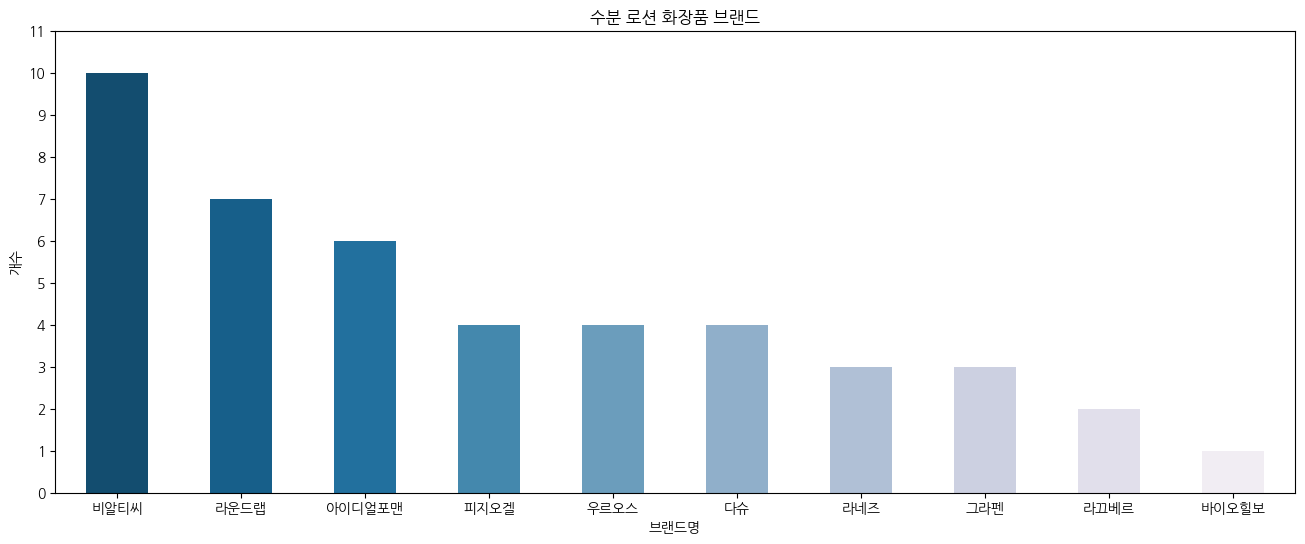

In [16]:
temp1 = lotion_df_r[lotion_df_r['보습%']>=58].sort_values(by='보습%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='PuBu_r', width=0.5)
plt.title('수분 로션 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 12, 1));

/tmp/ipykernel_13931/3289100916.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='PuBu_r', width=0.5)


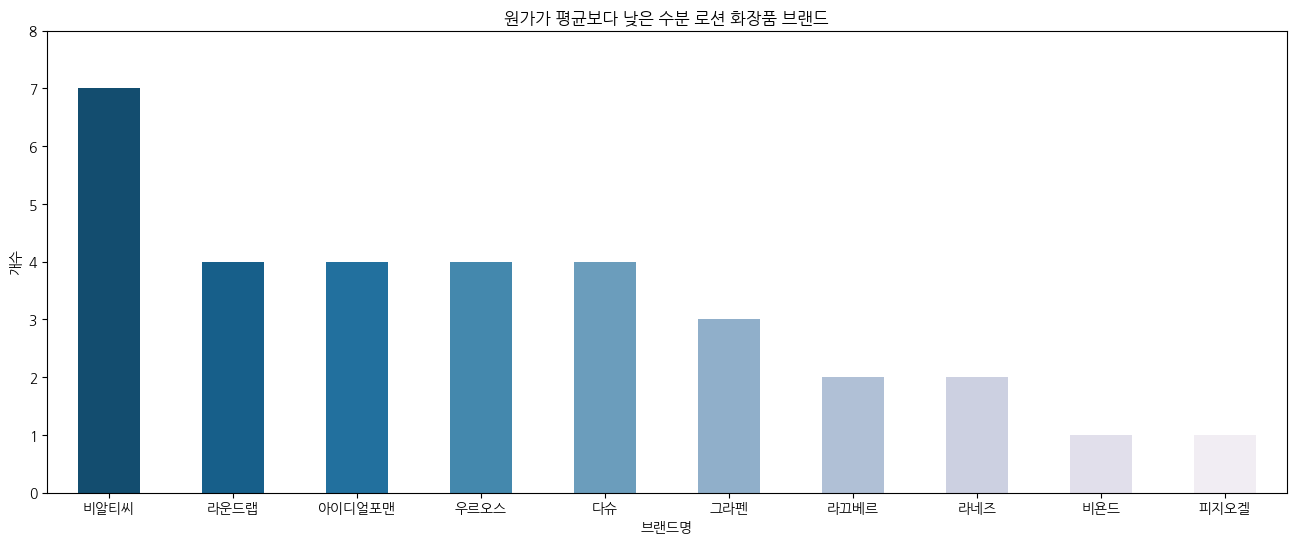

In [17]:
temp1 = lotion_df_m[lotion_df_m['보습%']>=58].sort_values(by='보습%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='PuBu_r', width=0.5)
plt.title('원가가 평균보다 낮은 수분 로션 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 9, 1));

진정

/tmp/ipykernel_13931/3035958558.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='BuGn_r', width=0.5)


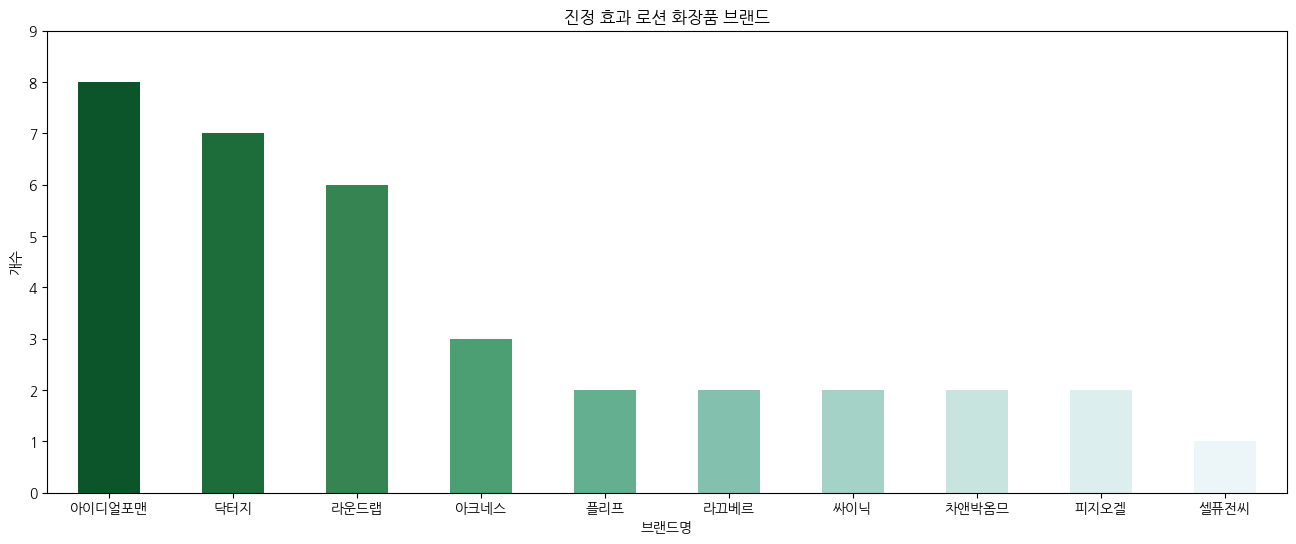

In [18]:
temp1 = lotion_df_r[lotion_df_r['진정%']>=37].sort_values(by='진정%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='BuGn_r', width=0.5)
plt.title('진정 효과 로션 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 10, 1));

/tmp/ipykernel_13931/3639947934.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='BuGn_r', width=0.5)


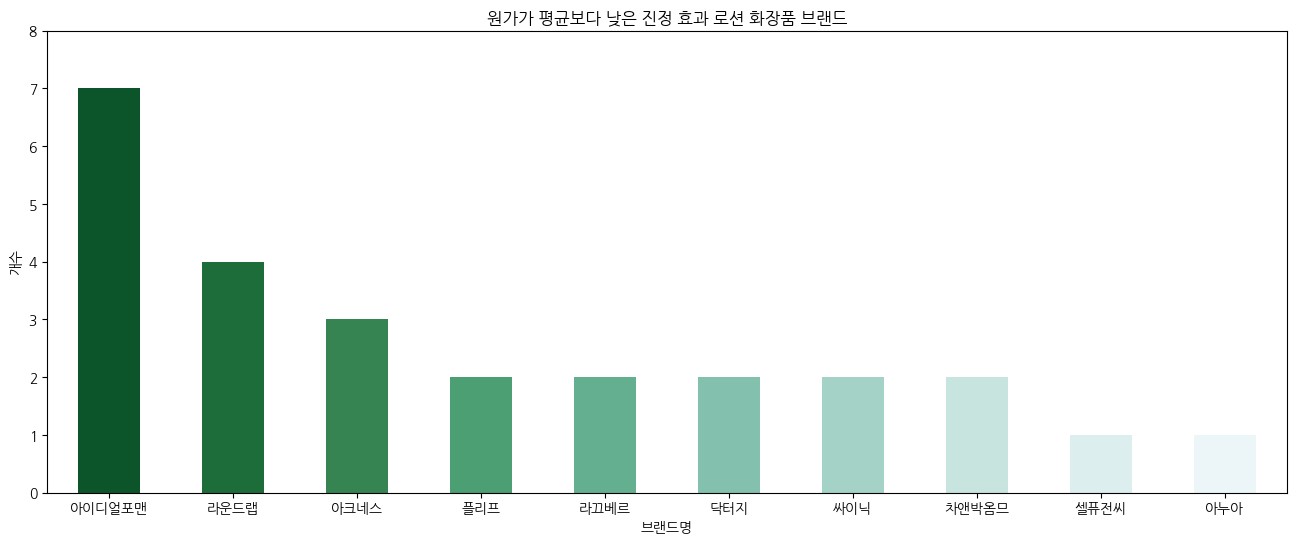

In [19]:
temp1 = lotion_df_m[lotion_df_m['진정%']>=37].sort_values(by='진정%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='BuGn_r', width=0.5)
plt.title('원가가 평균보다 낮은 진정 효과 로션 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 9, 1));

주름/미백

/tmp/ipykernel_13931/4125250428.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='YlOrRd_r', width=0.5)


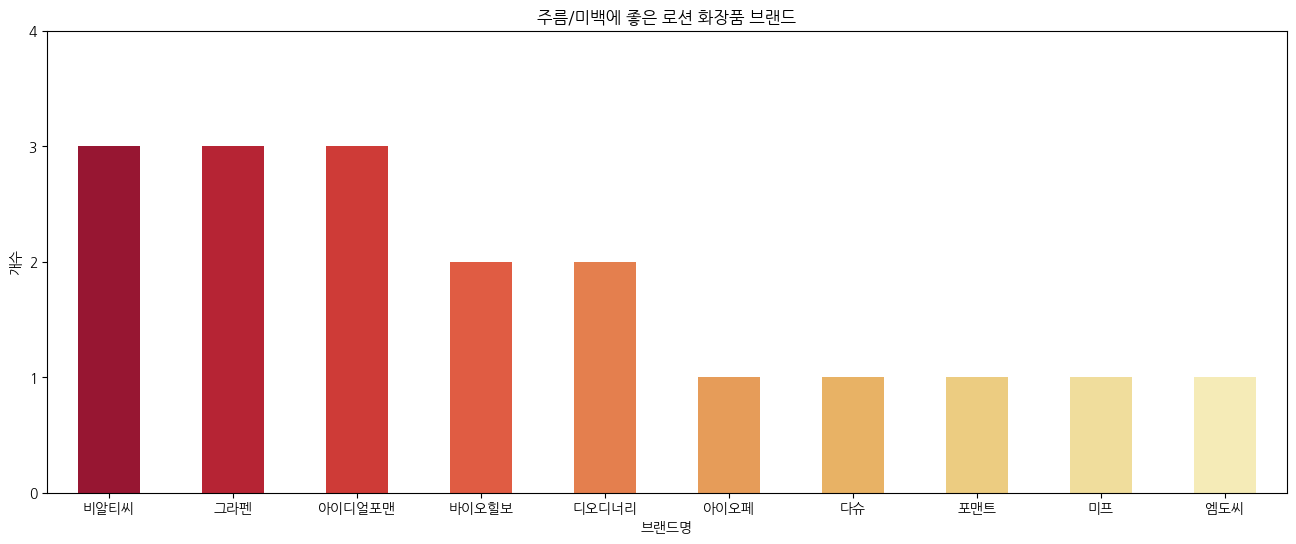

In [20]:
temp1 = lotion_df_r[lotion_df_r['주름/미백%']>7].sort_values(by='주름/미백%')

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='YlOrRd_r', width=0.5)
plt.title('주름/미백에 좋은 로션 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 5, 1));

/tmp/ipykernel_13931/396915257.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='YlOrRd_r', width=0.5)


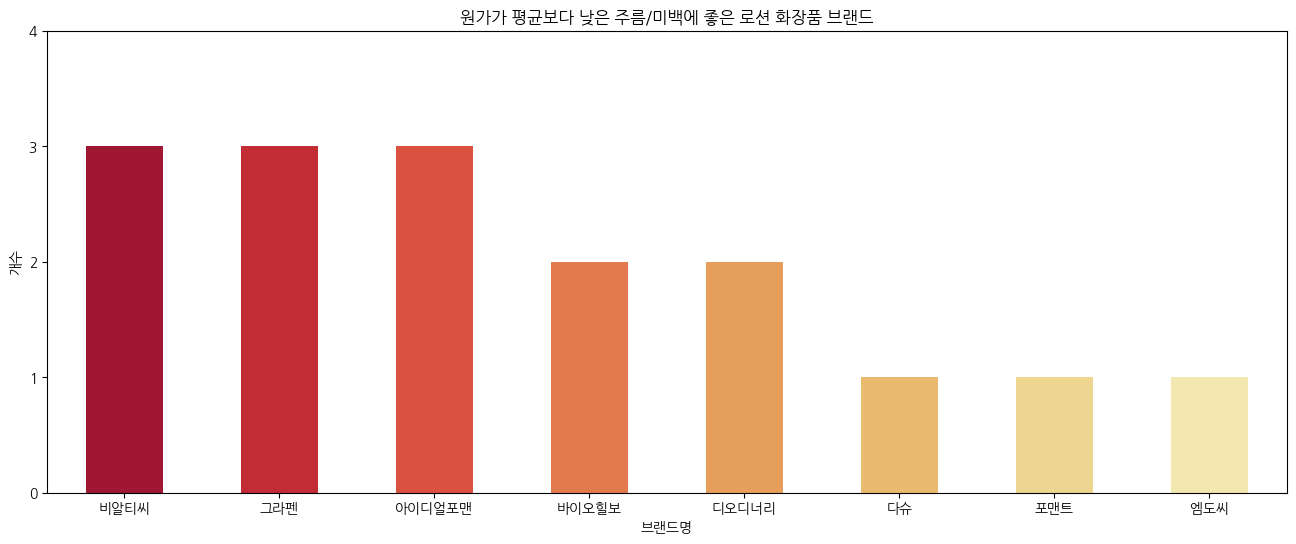

In [21]:
temp1 = lotion_df_m[lotion_df_m['주름/미백%']>7].sort_values(by='주름/미백%')

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='YlOrRd_r', width=0.5)
plt.title('원가가 평균보다 낮은 주름/미백에 좋은 로션 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 5, 1));